In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Purpose

This notebook is where the 2OI method is derived from the paper and implemented in methods.

# Derivation

Restricting the investigation of stochastic dynamics in the two-dimensional phase space.

$$ \frac{d}{ds} x_1 = x_2$$
$$ \frac{d}{ds} x_2 = -a_1(x_1) - a_2(x_1,x_2) + a_3(x_1)\eta_1 + a_4 \eta_2$$

- We have $\eta_1,\eta_2$ as white noise gaussian processes. 
- $a_1(x_1)$ can be an arbitrary nonlinear potential (field), $a_2(x_1,x_2)$ can include van der Pol-like damping terms, $a_3(x_1)\eta_1$ describes random parameters and $a_4\eta_2$ represents an additive noise term.

The corresponding (Ito) Fokker-Planck Equation for the probability density reads:

   $$\frac{\partial}{\partial s} p(x_1,x_2,s) = -\frac{\partial}{\partial x_1}[x_2\cdot p(x_1,x_2,s)] + \frac{\partial}{\partial x_2}[(a_1(x_1) + a_2(x_1,x_2))\cdot p(x_1,x_2,s)] + \frac{1}{2}\frac{\partial^2}{\partial x^2_2}[(a_3^2(x_1)+a_4^2)\cdot p(x_1,x_2,s)]$$

The previous equation could be written in the form of two fluxes, one in $x_1$ and one in $x_2$ such that:

$$\frac{\partial p}{\partial s} = \frac{\partial A}{\partial x_1} + \frac{\partial B}{\partial x_2}$$

First we need to evaluate implicitly the $x_2$ derivative, and also the $x_1$ derivative implicitly.

$$ \frac{p_{i,j}^{n+\frac{1}{2}}-p_{i,j}^{n}}{\Delta s} = \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

Which can also be written as:

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

This means we have a tri-diagonal expression for the first half step up into p. We define F as the following:

$$F_{i,j + \frac{1}{2}} = D \frac{p_{i,j+1} - p_{i,j}}{\Delta x_2} + [a_1(x_1) + a_2(x_1,x_2 + \Delta x_2)]\frac{p_{i,j+1} - p_{i,j}}{2}$$

Where we have $D = \frac{[a_3^2(x_1) + a_4^2]}{2}$.

For the second half step we need to do the following:

$$ \frac{p_{i,j}^{n+1}-p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = -x_2 \frac{p_{i+1,j}^{n+1}-p_{i-1,j}^{n+1}}{2\Delta x_1}$$

Let's try building something like this now:

Rephrasing the first implicit derivative:

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

Which can also be written as:

$$F_{i,j + \frac{1}{2}} = D \frac{p_{i,j+1} - p_{i,j}}{\Delta x_2} + [a_1(x_1) + a_2(x_1,x_2 + \Delta x_2)]\frac{p_{i,j+1} + p_{i,j}}{2}$$

At this point we also realize that C and E will be dependent on $x_1$ and $x_2$ therefore we have $D_{i,j},C_{i,j},E_{i,j}$. This will mean that our variables at (i,j) will correspond to evaluating $F_{i,j+\frac{1}{2}}$.

$$C_{i,j} = \frac{[a_1(x_1) + a_2(x_1,x_2 + \Delta x_2)]}{2}$$

$$E_{i,j} = \frac{D_{i,j}}{\Delta x_2}$$

$$F_{i,j + \frac{1}{2}} = E_{i,j}\cdot(p_{i,j+1} - p_{i,j})+ C_{i,j}\cdot(p_{i,j+1} + p_{i,j})$$

$$F_{i,j + \frac{1}{2}} = (C_{i,j}+E_{i,j})\cdot(p_{i,j+1} ) - (E_{i,j}-C_{i,j})\cdot(p_{i,j} )$$

$$F_{i,j - \frac{1}{2}} = (C_{i,j-1}+E_{i,j-1})\cdot(p_{i,j} ) - (E_{i,j-1}-C_{i,j-1})\cdot(p_{i,j-1} )$$


Therefore if we have $F_{i,j + \frac{1}{2}}-F_{i,j - \frac{1}{2}}$, we will get:

$$F_{i,j + \frac{1}{2}}-F_{i,j - \frac{1}{2}} = (C_{i,j}+E_{i,j})\cdot p_{i,j+1}  - [(E_{i,j}-C_{i,j})\cdot p_{i,j}+(C_{i,j-1}+E_{i,j-1})\cdot p_{i,j}] +(E_{i,j-1}-C_{i,j-1})\cdot p_{i,j-1} $$

Therefore combining the two for the implicit derivative in the $x_2$ we get:

$$ \frac{p_{i,j}^{n+\frac{1}{2}}-p_{i,j}^{n}}{\Delta s} = \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s}+\frac{(C_{i,j}+E_{i,j})\cdot p_{i,j+1}^{n+\frac{1}{2}}  - [(E_{i,j}-C_{i,j})\cdot p_{i,j}^{n+\frac{1}{2}}+(C_{i,j-1}+E_{i,j-1})\cdot p_{i,j}^{n+\frac{1}{2}}] +(E_{i,j-1}-C_{i,j-1})\cdot p_{i,j-1}^{n+\frac{1}{2}}}{\Delta x_2}$$

$$ p_{i,j}^{n+\frac{1}{2}} = p_{i,j}^{n} + \Delta s(\frac{(C_{i,j}+E_{i,j})\cdot p_{i,j+1}^{n+\frac{1}{2}}  - [(E_{i,j}-C_{i,j})+(C_{i,j-1}+E_{i,j-1})]\cdot p_{i,j}^{n+\frac{1}{2}} +(E_{i,j-1}-C_{i,j-1})\cdot p_{i,j-1}^{n+\frac{1}{2}}}{\Delta x_2})$$

Therefore in Tri-diagonal Form we get:

$$ -p_{i,j}^{n} = -p_{i,j}^{n+\frac{1}{2}} + \frac{\Delta s \cdot (C_{i,j}+E_{i,j})\cdot p_{i,j+1}^{n+\frac{1}{2}}}{\Delta x_2} + \frac{ - \Delta s \cdot [(E_{i,j}-C_{i,j})+(C_{i,j-1}+E_{i,j-1})]\cdot p_{i,j}^{n+\frac{1}{2}}}{\Delta x_2} +\frac{\Delta s \cdot (E_{i,j-1}-C_{i,j-1})\cdot p_{i,j-1}^{n+\frac{1}{2}}}{\Delta x_2}$$

This is under the assumption that $E_{i,j}=E_{i,j-1}$. We will also set $C_{i,j}=C_{i,j-1}$ This will prevent the method from "losing" probability and suffer constantly increasing/decreasing values.

# First Operator

In [2]:
dim = 81

nx = np.linspace(-4,4,dim)
ny = np.linspace(-4,4,dim)

# nx = np.linspace(-4-np.diff(nx)[0],4+np.diff(nx)[0],dim+2)
# ny = np.linspace(-4-np.diff(ny)[0],4+np.diff(ny)[0],dim+2)

X, Y = np.meshgrid(nx,ny)

# Defining constants and functions used in creating the operators
K=1
gamma = 2.1
sigma = 0.8
delta_s = np.pi/1000

a_1 = lambda x,y: K*x
a_2 = lambda x,y: gamma*y
a_3 = lambda x,y: 0
a_4 = lambda x,y: sigma

delta_x = np.diff(X,axis=1).max()
delta_y = np.diff(Y,axis=0).max()

C = (a_1(X,Y)+a_2(X,Y))/2
D = 0.8
E = (D/delta_y)*np.ones(C.shape)
H = delta_s*Y/(2*delta_x)

Now in order to evaluate this we are going to need to create a tri-diagonal matrix system since our solver is implicit

In [3]:
temp = C[:,3].copy()
E_temp= E[:,3].copy()

top_diag = temp[:-1]
bot_diag = temp[:-1]

E_top_diag = E_temp[1:]
E_bot_diag = E_temp[:-1]

#Building the matrix for the derivative of x_2
mid_diag = np.pad(bot_diag[:-1]-top_diag[1:],((1,1)),'constant')+np.pad(E_bot_diag[:-1]+E_top_diag[1:],((1,1)),'constant')
A = np.diag(top_diag,1)-np.diag(bot_diag,-1)-np.diag(mid_diag,0)+np.diag(E_top_diag,1)+np.diag(E_bot_diag,-1)
A*=(delta_s/delta_y)
A+= -np.eye(dim)
A[0,1]=0
A[-1,-2]=0

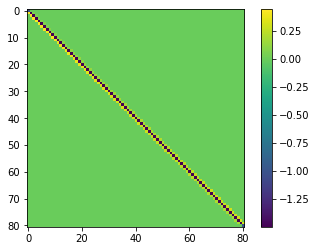

In [4]:
plt.imshow(A);plt.colorbar()

# Second Operator

In order to evaluate on the next expression we have:

$$\frac{p_{i,j}^{n+1}-p_{i,j}^{n+\frac{1}{2}}}{\Delta s} =-x_2\cdot\frac{p_{i+1,j}^{n+1}-p_{i-1,j}^{n+1}}{2\Delta x_1}$$

Therefore during this into a tridiagonal system we get:

$$p_{i,j}^{n+1}-p_{i,j}^{n+\frac{1}{2}} = -\Delta s \cdot x_2\cdot\frac{p_{i+1,j}^{n+1}-p_{i-1,j}^{n+1}}{2\Delta x_1}$$

$$-p_{i,j}^{n+\frac{1}{2}} = -p_{i,j}^{n+1} -\Delta s \cdot x_2\cdot\frac{p_{i+1,j}^{n+1}-p_{i-1,j}^{n+1}}{2\Delta x_1}$$

If we express $H_{i,j} = \frac{\Delta s \cdot x_2}{2\Delta x_1}$ we then have the following expression:

$$p_{i,j}^{n+\frac{1}{2}} = p_{i,j}^{n+1} + H_{i+1,j}\cdot p_{i+1,j}^{n+1}- H_{i-1,j}\cdot p_{i-1,j}^{n+1}$$

In [5]:
dim = 81

nx = np.linspace(0,8,dim)
ny = np.linspace(0,8,dim)

# nx = np.linspace(0-np.diff(nx)[0],8+np.diff(nx)[0],dim+2)
# ny = np.linspace(0-np.diff(ny)[0],8+np.diff(ny)[0],dim+2)

X, Y = np.meshgrid(nx,ny)

#Functions
delta_s = np.pi/1000


delta_x = np.diff(X,axis=1).max()
delta_y = np.diff(Y,axis=0).max()

H = delta_s*Y/(2*delta_x)

In [6]:
temp = H[3].copy()
top_diag = temp[1:]
bot_diag = temp[:-1]

#Building the matrix for the derivative of x_1
B = np.eye(dim)+np.diag(top_diag,1)-np.diag(bot_diag,-1)
B[0,1]=0
B[-1,-2]=0

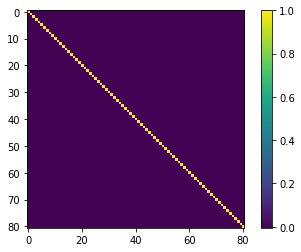

In [7]:
plt.imshow(B);plt.colorbar()

# Stability Analysis

For the stability analysis we can look at each step individually.

For the first step we have the following:

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{F_{i,j+\frac{1}{2}}^{n+\frac{1}{2}}-F_{i,j-\frac{1}{2}}^{n+\frac{1}{2}}}{\Delta x_2}$$

$$F_{i,j + \frac{1}{2}} = D \frac{p_{i,j+1} - p_{i,j}}{\Delta x_2} + [a_1(x_1) + a_2(x_1,x_2 + \Delta x_2)]\frac{p_{i,j+1} + p_{i,j}}{2}$$


We will consider $p_{i,j}^n=g(\xi)^n e^{i\xi j\Delta x}$ and we will approximate $a \approx [a_1(x_1) + a_2(x_1,x_2 + \Delta x_2)] \approx [a_1(x_1) + a_2(x_1,x_2 - \Delta x_2)]$

$$F_{i,j + \frac{1}{2}} = D \frac{p_{i,j+1} - p_{i,j}}{\Delta x_2} + a\frac{p_{i,j+1} + p_{i,j}}{2}$$

$$ \frac{p_{i,j}^{n+\frac{1}{2}}}{\Delta s} = \frac{p_{i,j}^{n}}{\Delta s} + \frac{D \frac{p_{i,j+1}^{n + \frac{1}{2}} - p_{i,j}^{n + \frac{1}{2}}}{\Delta x_2} + a\frac{p_{i,j+1}^{n + \frac{1}{2}} + p_{i,j}^{n + \frac{1}{2}}}{2}-[D \frac{p_{i,j}^{n + \frac{1}{2}} - p_{i,j-1}^{n + \frac{1}{2}}}{\Delta x_2} + a\frac{p_{i,j}^{n + \frac{1}{2}} + p_{i,j-1}^{n + \frac{1}{2}}}{2}]}{\Delta x_2}$$

$$ \frac{g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x}}{\Delta s} = \frac{g(\xi)^{n} e^{i\xi j\Delta x}}{\Delta s} + \frac{D \frac{g(\xi)^{n+\frac{1}{2}} e^{(i)\xi (j+1)\Delta x} - g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x}}{\Delta x_2} + a\frac{g(\xi)^{n+\frac{1}{2}} e^{(i)\xi (j+1)\Delta x} + g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x}}{2}-[D \frac{g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x} - g(\xi)^{n+\frac{1}{2}} e^{(i)\xi (j-1)\Delta x}}{\Delta x_2} + a\frac{g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x} + g(\xi)^{n+\frac{1}{2}} e^{(i)\xi (j-1)\Delta x}}{2}]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{D \frac{ e^{\xi i\Delta x} - 1}{\Delta x_2} + a\frac{ e^{\xi i\Delta x} + 1}{2}-[D \frac{1 - e^{-\xi i\Delta x}}{\Delta x_2} + a\frac{1 + e^{-\xi i\Delta x}}{2}]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{D [\frac{ e^{\xi i\Delta x} - 1}{\Delta x_2} -\frac{1 - e^{-\xi i\Delta x}}{\Delta x_2}]+ a[\frac{ e^{\xi i\Delta x} + 1}{2} - \frac{1 + e^{-\xi i\Delta x}}{2}]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{D [\frac{ e^{\xi i\Delta x} - 2 + e^{-\xi i\Delta x}}{\Delta x_2}]+ a[\frac{ e^{\xi i\Delta x}-e^{-\xi i\Delta x}}{2}]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{D [\frac{ - 2 + 2 \cos(\xi \Delta x)}{\Delta x_2}]+ a[\frac{i\sin(\xi \Delta x)}{1}]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{D [\frac{- 2 + 2- 4 \sin^2(\frac{\xi \Delta x}{2})}{\Delta x_2}]+ a[i\sin(\xi \Delta x)]}{\Delta x_2}$$

$$ \frac{1}{\Delta s} = \frac{g(\xi)^{-\frac{1}{2}}}{\Delta s} + \frac{- 4D}{\Delta x_2^2} \sin^2(\frac{\xi \Delta x}{2})+ \frac{1}{{\Delta x_2}}a[i\sin(\xi \Delta x)]$$

$$ 1 = g(\xi)^{-\frac{1}{2}} + \frac{- 4D \Delta s}{\Delta x_2^2} \sin^2(\frac{\xi \Delta x}{2})+ \frac{\Delta s}{{\Delta x_2}}a[i\sin(\xi \Delta x)]$$

$$ 1+\frac{ 4D \Delta s}{\Delta x_2^2} \sin^2(\frac{\xi \Delta x}{2})- \frac{\Delta s}{{\Delta x_2}}a[i\sin(\xi \Delta x)] = g(\xi)^{-\frac{1}{2}}$$

Therefore if we consider a half step as a whole step we have:

$$g(\xi) = \frac{1}{1+\frac{ 4D \Delta s}{\Delta x_2^2} \sin^2(\frac{\xi \Delta x}{2})- \frac{\Delta s}{{\Delta x_2}}a[i\sin(\xi \Delta x)]}$$

For the second step we have:

Now we will consider $p_{i,j}^n=g(\xi)^n e^{i\xi j\Delta x}$

$$\frac{p_{i,j}^{n+1}-p_{i,j}^{n+\frac{1}{2}}}{\Delta s} =-x_2\cdot\frac{p_{i+1,j}^{n+1}-p_{i-1,j}^{n+1}}{2\Delta x_1}$$


$$\frac{g(\xi)^{n+1} e^{i\xi j\Delta x}-g(\xi)^{n+\frac{1}{2}} e^{i\xi j\Delta x}}{\Delta s} =-x_2\cdot\frac{g(\xi)^{n+1} e^{(i)\xi (j+1)\Delta x}-g(\xi)^{n+1} e^{(i)\xi (j-1)\Delta x}}{2\Delta x}$$

$$ \frac{1-g(\xi)^{-\frac{1}{2}}}{\Delta s} =-x_2\cdot\frac{e^{\xi i\Delta x} -e^{-\xi i\Delta x}}{2\Delta x}$$

Using $e^{\xi j\Delta x} = \cos(\xi j\Delta x) + i\sin(\xi j\Delta x)$ we get:

$$ \frac{1-g(\xi)^{-\frac{1}{2}}}{\Delta s} =-x_2\cdot\frac{\cos(\xi \Delta x) + i\sin(\xi \Delta x) - (\cos(\xi \Delta x) - i\sin(\xi \Delta x))}{2\Delta x}$$

$$ \frac{1-g(\xi)^{-\frac{1}{2}}}{\Delta s} =-x_2\cdot\frac{2i\sin(\xi \Delta x)}{2\Delta x}$$

$$ 1-g(\xi)^{-\frac{1}{2}} =-x_2\cdot\frac{\Delta s}{\Delta x}i\sin(\xi \Delta x)$$

$$ g(\xi)^{-\frac{1}{2}} = 1+ x_2\cdot\frac{\Delta s}{\Delta x}i\sin(\xi \Delta x)$$

If we consider the fraction half step as a full half step we will have:

$$ g(\xi)= \frac{1}{1+ x_2\cdot\frac{\Delta s}{\Delta x}i\sin(\xi \Delta x)}$$